In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
# Cargar el dataset con pandas
df = pd.read_csv('car data.csv')

# Mostrar las primeras 5 filas para revisar el contenido
df.head()


NameError: name 'pd' is not defined

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Cargar el dataset con pandas
df = pd.read_csv('car data.csv')

# Mostrar las primeras 5 filas para revisar el contenido
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'car data.csv'

In [9]:
import pandas as pd

# Cargar el dataset desde la ubicación actual
df = pd.read_csv("C:/Users/fabia/car data.csv")

# Mostrar las primeras 5 filas del dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# Dimensiones del dataset (filas, columnas)
df.shape


(301, 9)

In [13]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
# Importar datetime para obtener el año actual
from datetime import datetime

# Crear columna de antigüedad del vehículo
df['Car_Age'] = datetime.now().year - df['Year']

# Eliminar columnas innecesarias
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# Verificar los cambios
df.head()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [17]:
# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, drop_first=True)

# Ver el nuevo DataFrame
df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [19]:
# Convertir booleanos a enteros (0 y 1)
df = df.astype(int)

# Revisar el resultado
df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,11,0,1,0,1
1,4,9,43000,0,12,1,0,0,1
2,7,9,6900,0,8,0,1,0,1
3,2,4,5200,0,14,0,1,0,1
4,4,6,42450,0,11,1,0,0,1


In [21]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [27]:
# Predecir con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R^2 (Score de precisión): {r2:.2f}")


Error absoluto medio (MAE): 0.72
R^2 (Score de precisión): 0.95


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Ajustar hiperparámetros
modelo = RandomForestRegressor(
    n_estimators=200,       # más árboles
    max_depth=10,           # profundidad máxima del árbol
    min_samples_split=5,    # mínimo de muestras para dividir
    min_samples_leaf=2,     # mínimo de muestras por hoja
    random_state=42
)

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")
print(f"RMSE: {round(rmse, 2)}")
print(f"R² Score: {round(r2, 2)}")


MAE: 0.73
MSE: 1.31
RMSE: 1.14
R² Score: 0.94


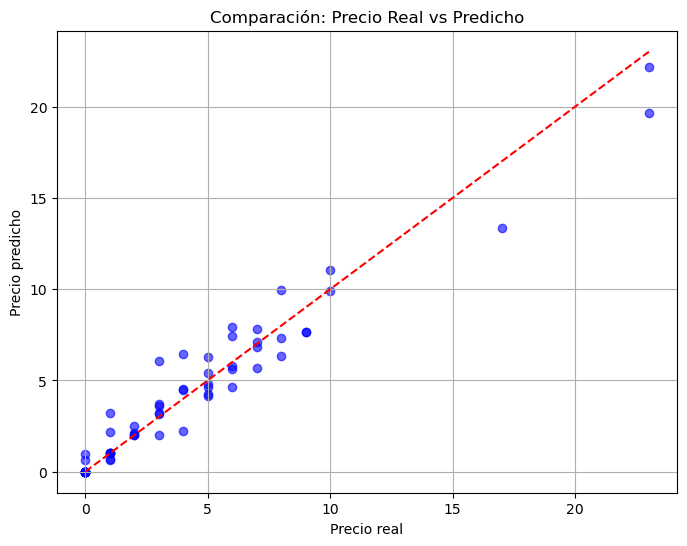

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación: Precio Real vs Predicho')
plt.grid(True)
plt.show()


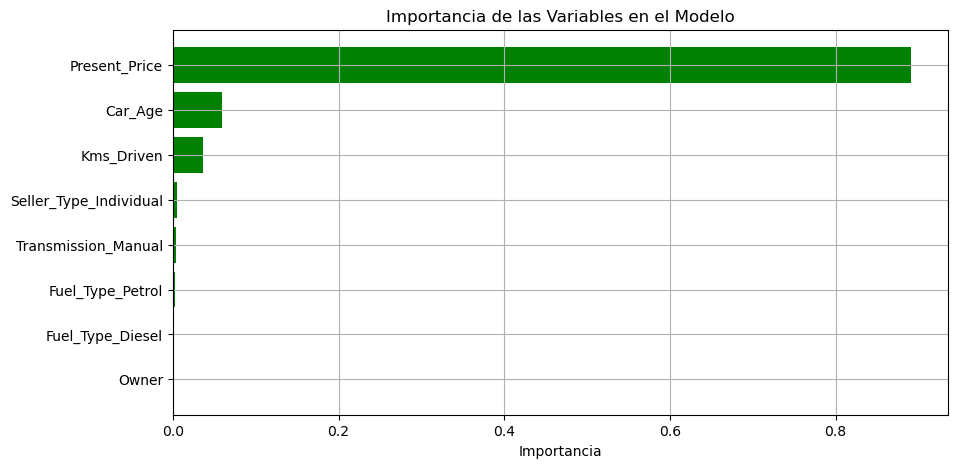

In [37]:
import pandas as pd

importancia = modelo.feature_importances_
features = X.columns

importancia_df = pd.DataFrame({'Feature': features, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='green')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
